# Spectral Line Search

This example shows how to use dysh to search for spectral lines.
Searches can be done for a user-specified frequency range or for the frequency axis of a Spectrum.
You can use a remote query to [Splatalogue](https://splatalogue.online/) or use local tables distributed with dysh.

First we show how to do a search using a [``SpectralLineSearch``](https://dysh.readthedocs.io/en/latest/reference/modules/dysh.line.html#dysh.line.SpectralLineSearchClass) object, then using a [``Spectrum``](https://dysh.readthedocs.io/en/latest/reference/modules/dysh.spectra.html#dysh.spectra.spectrum.Spectrum) object. Examples are given both with and without a redshift value. 

## Loading Modules
We start by loading the modules we will use. 

In [1]:
# These modules are required for this example.
from dysh.line import SpectralLineSearch
from dysh.spectra import Spectrum
from astropy import units as u

## Example 1.  Doing an online or local search with SpectralLineSearch
[``SpectralLineSearch``](https://dysh.readthedocs.io/en/latest/reference/modules/dysh.line.html#dysh.line.SpectralLineSearchClass) is a thin wrapper on top of [``astroquery.splatalogue.Splatalogue``](https://astroquery.readthedocs.io/en/latest/splatalogue/splatalogue.html), with some additional conveniences for working in dysh and with GBT data.
You search a catalog in a given frequency range, optionally narrow down to specific molecules, line strengths, energies, etc.
The return object is an astropy [``Table``](https://docs.astropy.org/en/stable/api/astropy.table.Table.html#astropy.table.Table).
Below are a few example searches.

### Do an online search for N2H+ lines between 80 and 400 GHz
Online searching of Splatalogue is the default. 
Note in this example we use an initial space in the ``chemical_name`` to eliminate other molecules that have the string ``'N2H+'`` in them. 
We set an ``intensity_lower_limit`` to weed out some of the weaker satellite lines.
When giving an ``intensity_lower_limit``, one must also provide an ``intensity_type`` string, a minimum match to ``'CDMS/JPL (log)'``, ``'Sij-mu2'``, or ``'Aij (log)'``. 

In [2]:
minfreq = 80*u.GHz
maxfreq = 400*u.GHz
table = SpectralLineSearch.query_lines(minfreq, maxfreq, 
                                       chemical_name=" N2H+", 
                                       intensity_lower_limit=-3, 
                                       intensity_type="CDMS")

In [3]:
print(f"{len(table)} rows returned.")

57 rows returned.


To inspect the available columns use the [``Table.colnames``](https://docs.astropy.org/en/stable/api/astropy.table.Table.html#astropy.table.Table.colnames) attribute:

In [4]:
print(table.colnames)

['species_id', 'name', 'chemical_name', 'resolved_QNs', 'linelist', 'LovasASTIntensity', 'lower_state_energy', 'upper_state_energy', 'sijmu2', 'sij', 'aij', 'intintensity', 'Lovas_NRAO', 'rest_frequency', 'lower_state_energy_K', 'upper_state_energy_K', 'orderedFreq', 'measFreq', 'upperStateDegen', 'moleculeTag', 'qnCode', 'labref_Lovas_NIST', 'rel_int_HFS_Lovas', 'unres_quantum_numbers', 'lineid', 'transition_in_space', 'transition_in_G358', 'obsref_Lovas_NIST', 'source_Lovas_NIST', 'telescope_Lovas_NIST', 'transitionBandColor', 'searchErrorMessage', 'sqlquery', 'requestnumber', 'obs_frequency']


The ``rest_frequency`` column is the rest frequency of the transition in MHz. 

Some columns in the table often have embedded HTML.
That's the way they come from Splatalogue.
`¯\_(ツ)_/¯`



In [5]:
table

species_id,name,chemical_name,resolved_QNs,linelist,LovasASTIntensity,lower_state_energy,upper_state_energy,sijmu2,sij,aij,intintensity,Lovas_NRAO,rest_frequency,lower_state_energy_K,upper_state_energy_K,orderedFreq,measFreq,upperStateDegen,moleculeTag,qnCode,labref_Lovas_NIST,rel_int_HFS_Lovas,unres_quantum_numbers,lineid,transition_in_space,transition_in_G358,obsref_Lovas_NIST,source_Lovas_NIST,telescope_Lovas_NIST,transitionBandColor,searchErrorMessage,sqlquery,requestnumber,obs_frequency
int64,str57,str11,str44,str4,str4,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,str71,str67,str2,int64,int64,str1,str1,str18,int64,int64,int64,str6,str8,str13,str18,str1,object,int64,float64
148,"N<sub>2</sub>H<sup>+</sup> <font color=""red"">v = 0</font>",Diazenylium,"J= 1 - 0, F<sub>1</sub>= 1- 1",JPL,0.8,0.0,3.10788,37.25038,3.222,-4.40932,-2.7844,1,93171.88,0.0,4.47152,<span style = 'color: #DC143C'></span>,"93.17188 (0.04), <span style = 'color: #DC143C'>93.17188</span>",9,-29005,102,,,J=1-0-F1=1-1,830340,1,0,Cas95,L134N,NRAO 11m,datatableskyblue,,None,0,93171.88
148,"N<sub>2</sub>H<sup>+</sup> <font color=""red"">v = 0</font>",Diazenylium,J = 1 - 0,CDMS,,0.0,3.10793,104.04257,0.0,-4.44034,-2.3383,1,93173.3977,0.0,4.47165,"93.1733977 (0.001), <span style = 'color: #DC143C'>93.1733977</span>",<span style = 'color: #DC143C'></span>,27,29506,101,,,1 0,14632649,0,0,,,,datatableskyblue,,None,0,93173.3977
148,"N<sub>2</sub>H<sup>+</sup> <font color=""red"">v = 0</font>",Diazenylium,"J= 1 - 0, F<sub>1</sub>= 2- 1",JPL,0.6,0.0,3.10794,62.08887,5.371,-4.40926,-2.5625,1,93173.7,0.0,4.47161,<span style = 'color: #DC143C'></span>,"93.1737 (0.04), <span style = 'color: #DC143C'>93.1737</span>",15,-29005,102,,,J=1-0-F1=2-1,830341,1,0,Cas95,L134N,NRAO 11m,datatableskyblue,,None,0,93173.7
148,"N<sub>2</sub>H<sup>+</sup> <font color=""red"">v = 0</font>",Diazenylium,"J= 1- 0,F<sub>1</sub>= 2- 1,F= 3- 2",CDMS,,0.0,3.10794,26.97166,0.0,-4.44038,-2.9246,1,93173.7699,0.0,4.47166,"93.1737699 (0.0012), <span style = 'color: #DC143C'>93.1737699</span>",<span style = 'color: #DC143C'></span>,7,29506,103,,,1 2 3 0 1 2,14632704,0,0,,,,datatableskyblue,,None,0,93173.7699
148,"N<sub>2</sub>H<sup>+</sup> <font color=""red"">v = 0</font>",Diazenylium,"J= 2- 1,F<sub>1</sub>= 2- 2,F= 3- 3",CDMS,,3.1079,9.32363,8.12394,0.0,-4.05846,-2.8534,1,186342.9249,4.4716,13.41471,"186.3429249 (0.0022), <span style = 'color: #DC143C'>186.3429249</span>",<span style = 'color: #DC143C'></span>,7,29506,103,,,2 2 3 1 2 3,14632714,0,0,,,,datatableyellow,,None,0,186342.9249
148,"N<sub>2</sub>H<sup>+</sup> <font color=""red"">v = 0</font>",Diazenylium,"J= 2- 1,F<sub>1</sub>= 1- 0,F= 1- 1",CDMS,,3.108,9.32374,7.46735,0.0,-3.72708,-2.89,1,186343.0616,4.47175,13.41486,"186.3430616 (0.002), <span style = 'color: #DC143C'>186.3430616</span>",<span style = 'color: #DC143C'></span>,3,29506,103,,,2 1 1 1 0 1,14632716,0,0,,,,datatableyellow,,None,0,186343.0616
148,"N<sub>2</sub>H<sup>+</sup> <font color=""red"">v = 0</font>",Diazenylium,"J= 2- 1,F<sub>1</sub>= 1- 0,F= 2- 1",CDMS,,3.108,9.32374,12.86961,0.0,-3.71253,-2.6536,1,186343.2691,4.47175,13.41487,"186.3432691 (0.0023), <span style = 'color: #DC143C'>186.3432691</span>",<span style = 'color: #DC143C'></span>,5,29506,103,,,2 1 2 1 0 1,14632718,0,0,,,,datatableyellow,,None,0,186343.2691
148,"N<sub>2</sub>H<sup>+</sup> <font color=""red"">v = 0</font>",Diazenylium,"J= 2- 1,F<sub>1</sub>= 2- 1,F= 2- 1",CDMS,,3.1079,9.32368,13.81529,0.0,-3.68173,-2.6228,1,186344.3941,4.4716,13.41478,"186.3443941 (0.002), <span style = 'color: #DC143C'>186.3443941</span>",<span style = 'color: #DC143C'></span>,5,29506,103,,,2 2 2 1 1 1,14632721,0,0,,,,datatableyellow,,None,0,186344.3941
148,"N<sub>2</sub>H<sup>+</sup> <font color=""red"">v = 0</font>",Diazenylium,J = 2 - 1,CDMS,,3.1079,9.32369,208.09363,0.0,-3.45807,-1.4449,1,186344.6844,4.4716,13.4148,"186.3446844 (0.002), <span style = 'color: #DC143C'>186.3446844</span>",<span 

### Do a local search for methyl formate.
This uses a GBT-specific catalog distributed with dysh.
You can also provide your own catalog in an astropy [``Table``](https://docs.astropy.org/en/stable/api/astropy.table.Table.html#astropy.table.Table) format.
The first time you use a given catalog, there will be some additional overhead to read it in and cache it.
Subsequent searches will be faster because they use the cached version.
Note the default regular expression matching is case-insensitive. 
The ``gbtlines`` catalog has most lines from 300 MHz to 120 GHz, and commonly observed redshifted lines from 120 GHz to 5 THz.

In [6]:
minfreq = 400*u.MHz
maxfreq = 5550*u.MHz
table = SpectralLineSearch.query_lines(minfreq, maxfreq,
                                       cat='gbtlines', 
                                       chemical_name="methyl formate")

In [7]:
print(f"{len(table)} rows returned.")

48 rows returned.


In [8]:
table

species_id,name,chemical_name,resolved_QNs,linelist,LovasASTIntensity,lower_state_energy,upper_state_energy,sijmu2,sij,aij,intintensity,Lovas_NRAO,rest_frequency,lower_state_energy_K,upper_state_energy_K,orderedFreq,measFreq,upperStateDegen,moleculeTag,qnCode,labref_Lovas_NIST,rel_int_HFS_Lovas,unres_quantum_numbers,lineid,transition_in_space,transition_in_G358,obsref_Lovas_NIST,source_Lovas_NIST,telescope_Lovas_NIST,transitionBandColor,searchErrorMessage,sqlquery,requestnumber,obs_frequency
int64,str47,str14,str44,str6,bytes1,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,str67,str64,str3,int64,int64,str5,bytes1,str20,int64,int64,int64,bytes1,bytes1,bytes1,str13,bytes1,object,int64,float64
393,"CH<sub>3</sub>OCHO <font color=""red"">v=0</font>",Methyl Formate,"1(1, 0) - 1(1, 1), v<sub>t</sub> = 0 - 0, A",ToyaMA,--,0.9,0.95371,0.0,0.0,0.0,0.03537,0,1610.249,1.29491,1.37219,<span style = 'color: #DC143C'></span>,"1.610249 (0.003), <span style = 'color: #DC143C'>1.610249</span>",--,0,0,Brown,--,--,10692427,0,0,--,--,--,datatablegrey,--,--,0,1610.249
393,"CH<sub>3</sub>OCHO <font color=""red"">v=0</font>",Methyl Formate,"1(1, 0) - 1(1, 1), v<sub>t</sub> = 0 - 0, E",ToyaMA,--,0.9,0.95373,0.0,0.0,0.0,0.03537,0,1610.906,1.29491,1.37222,<span style = 'color: #DC143C'></span>,"1.610906 (0.003), <span style = 'color: #DC143C'>1.610906</span>",--,0,0,Brown,--,--,10692428,0,0,--,--,--,datatablegrey,--,--,0,1610.906
393,"CH<sub>3</sub>OCHO <font color=""red"">v=0</font>",Methyl Formate,"27( 8,19)-27( 8,20) A",JPL,--,185.6381,185.70448,10.70843,0.0,-10.74808,--,1,1990.0988,267.09028,267.18579,"1.9900988 (1.0E-4), <span style = 'color: #DC143C'>1.9900988</span>",<span style = 'color: #DC143C'></span>,110,60003,1404,--,--,27 819 0 27 820 0,11416364,0,0,--,--,--,datatablegrey,--,--,0,1990.0988
393,"CH<sub>3</sub>OCHO <font color=""red"">v=0</font>",Methyl Formate,"11( 4, 7)-11( 4, 8) A",JPL,--,34.5439,34.61039,6.89492,0.0,-10.55855,--,1,1993.2922,49.70068,49.79634,"1.9932922 (1.0E-4), <span style = 'color: #DC143C'>1.9932922</span>",<span style = 'color: #DC143C'></span>,46,60003,1404,--,--,11 4 7 0 11 4 8 0,11416365,0,0,--,--,--,datatablegrey,--,--,0,1993.2922
393,"CH<sub>3</sub>OCHO <font color=""red"">v=0</font>",Methyl Formate,"4( 2, 2)- 4( 2, 3) A",JPL,--,5.9236,5.99132,4.62746,0.0,-10.30044,--,1,2030.0631,8.52269,8.62012,"2.0300631 (1.0E-4), <span style = 'color: #DC143C'>2.0300631</span>",<span style = 'color: #DC143C'></span>,18,60003,1404,--,--,4 2 2 0 4 2 3 0,11416366,0,0,--,--,--,datatablegrey,--,--,0,2030.0631
393,"CH<sub>3</sub>OCHO <font color=""red"">v=0</font>",Methyl Formate,"23( 7,16)-23( 7,17) A",JPL,--,136.5469,136.61859,9.7273,0.0,-10.62136,--,1,2149.165,196.4594,196.56254,"2.149165 (1.0E-4), <span style = 'color: #DC143C'>2.149165</span>",<span style = 'color: #DC143C'></span>,94,60003,1404,--,--,23 716 0 23 717 0,11416367,0,0,--,--,--,datatablegrey,--,--,0,2149.165
393,"CH<sub>3</sub>OCHO <font color=""red"">v=0</font>",Methyl Formate,"15( 5,10)-15( 5,11) A",JPL,--,60.9946,61.06816,7.80019,0.0,-10.50287,--,1,2205.377,87.75712,87.86296,"2.205377 (1.0E-4), <span style = 'color: #DC143C'>2.205377</span>",<span style = 'color: #DC143C'></span>,62,60003,1404,--,--,15 510 0 15 511 0,11416368,0,0,--,--,--,datatablegrey,--,--,0,2205.377
393,"CH<sub>3</sub>OCHO <font color=""red"">v=0</font>",Methyl Formate,"19( 6,13)-19( 6,14) A",JPL,--,94.997,95.0716,8.75245,0.0,-10.53441,--,1,2236.3094,136.67871,136.78603,"2.2363094 (1.0E-4), <span style = 'color: #DC143C'>2.2363094</span>",<span style = 'color: #DC143C'></span>,78,60003,1404,--,--,19 613 0 19 614 0,11416369,0,0,--,--,--,datatablegrey,--,--,0,2236.3094
393,"CH<sub>3</sub>OCHO <font color=""red"">v=0</font>",Methyl Formate,"36(10,26)-36(10,27) A",JPL,--,321.4598,321.54727,12.03857,0.0,-10.46084,--,1,2622.1518,462.50629,462.63213,"2.6221518 (2.0E-4), <span style = 'color: #DC143C'>2.6221518</span>",<span style = 'color: #DC143C'></span>,146,60003,

### Search for Recombination Lines
dysh has special methods to search for recombination lines of Hydrogen, Helium, and Carbon. 
[``SpectralLineSearch.recomb``](https://dysh.readthedocs.io/en/latest/reference/modules/dysh.line.html#dysh.line.SpectralLineSearchClass.recomb) will search for a specific atom/transition, while [``SpectralLineSearch.recomball``](https://dysh.readthedocs.io/en/latest/reference/modules/dysh.line.html#dysh.line.SpectralLineSearchClass.recomball) will search for all three species. 

In [9]:
minfreq = 300*u.MHz
maxfreq = 2.0*u.GHz
table = SpectralLineSearch.recomb(minfreq, maxfreq,
                                  cat='gbtrecomb',
                                  line="Hebeta")

In [10]:
table

species_id,name,chemical_name,resolved_QNs,linelist,LovasASTIntensity,lower_state_energy,upper_state_energy,sijmu2,sij,aij,intintensity,Lovas_NRAO,rest_frequency,lower_state_energy_K,upper_state_energy_K,orderedFreq,measFreq,upperStateDegen,moleculeTag,qnCode,labref_Lovas_NIST,rel_int_HFS_Lovas,unres_quantum_numbers,lineid,transition_in_space,transition_in_G358,obsref_Lovas_NIST,source_Lovas_NIST,telescope_Lovas_NIST,transitionBandColor,searchErrorMessage,sqlquery,requestnumber,obs_frequency
int64,str8,str25,str17,str6,bytes1,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,str56,str38,bytes1,int64,int64,bytes1,bytes1,str13,int64,int64,int64,bytes1,bytes1,bytes1,str13,bytes1,object,int64,float64
1161,He&beta;,Helium Recombination Line,He ( 351 ) &beta;,Recomb,--,0.0,0.0,0.0,0.0,0.0,--,1,301.685543664761,0.0,0.0,"0.301686, <span style = 'color: #DC143C'>0.301686</span>",<span style = 'color: #DC143C'></span>,--,0,0,--,--,He(351)&beta;,3956582,0,0,--,--,--,datatablegrey,--,--,0,301.685543664761
1161,He&beta;,Helium Recombination Line,He ( 350 ) &beta;,Recomb,--,0.0,0.0,0.0,0.0,0.0,--,1,304.271433765971,0.0,0.0,"0.304271, <span style = 'color: #DC143C'>0.304271</span>",<span style = 'color: #DC143C'></span>,--,0,0,--,--,He(350)&beta;,3956581,0,0,--,--,--,datatablegrey,--,--,0,304.271433765971
1161,He&beta;,Helium Recombination Line,He ( 349 ) &beta;,Recomb,--,0.0,0.0,0.0,0.0,0.0,--,1,306.886961777696,0.0,0.0,"0.306887, <span style = 'color: #DC143C'>0.306887</span>",<span style = 'color: #DC143C'></span>,--,0,0,--,--,He(349)&beta;,3956580,0,0,--,--,--,datatablegrey,--,--,0,306.886961777696
1161,He&beta;,Helium Recombination Line,He ( 348 ) &beta;,Recomb,--,0.0,0.0,0.0,0.0,0.0,--,1,309.532553535472,0.0,0.0,"0.309533, <span style = 'color: #DC143C'>0.309533</span>",<span style = 'color: #DC143C'></span>,--,0,0,--,--,He(348)&beta;,3956579,0,0,--,--,--,datatablegrey,--,--,0,309.532553535472
1161,He&beta;,Helium Recombination Line,He ( 347 ) &beta;,Recomb,--,0.0,0.0,0.0,0.0,0.0,--,1,312.20864223806103,0.0,0.0,"0.312209, <span style = 'color: #DC143C'>0.312209</span>",<span style = 'color: #DC143C'></span>,--,0,0,--,--,He(347)&beta;,3956578,0,0,--,--,--,datatablegrey,--,--,0,312.20864223806103
1161,He&beta;,Helium Recombination Line,He ( 346 ) &beta;,Recomb,--,0.0,0.0,0.0,0.0,0.0,--,1,314.915668596411,0.0,0.0,"0.314916, <span style = 'color: #DC143C'>0.314916</span>",<span style = 'color: #DC143C'></span>,--,0,0,--,--,He(346)&beta;,3956577,0,0,--,--,--,datatablegrey,--,--,0,314.915668596411
1161,He&beta;,Helium Recombination Line,He ( 345 ) &beta;,Recomb,--,0.0,0.0,0.0,0.0,0.0,--,1,317.654080986085,0.0,0.0,"0.317654, <span style = 'color: #DC143C'>0.317654</span>",<span style = 'color: #DC143C'></span>,--,0,0,--,--,He(345)&beta;,3956576,0,0,--,--,--,datatablegrey,--,--,0,317.654080986085
1161,He&beta;,Helium Recombination Line,He ( 344 ) &beta;,Recomb,--,0.0,0.0,0.0,0.0,0.0,--,1,320.42433560322803,0.0,0.0,"0.320424, <span style = 'color: #DC143C'>0.320424</span>",<span style = 'color: #DC143C'></span>,--,0,0,--,--,He(344)&beta;,3956575,0,0,--,--,--,datatablegrey,--,--,0,320.42433560322803
1161,He&beta;,Helium Recombination Line,He ( 343 ) &beta;,Recomb,--,0.0,0.0,0.0,0.0,0.0,--,1,323.226896624166,0.0,0.0,"0.323227, <span style = 'color: #DC143C'>0.323227</span>",<span style = 'color: #DC143C'></span>,--,0,0,--,--,He(343)&beta;,3956574,0,0,--,--,--,datatablegrey,--,--,0,323.226896624166


Search all recombination lines.
As with any astropy [``Table``](https://docs.astropy.org/en/stable/api/astropy.table.Table.html#astropy.table.Table), you can limit the displayed columns with a list.  Alternatively, you could limit the columns returns with the parameter `columns=['name', 'chemical_name', 'rest_frequency']`.

In [11]:
table = SpectralLineSearch.recomball(minfreq, maxfreq,
                                     cat='gbtrecomb')
table[['name', 'chemical_name', 'rest_frequency']]

name,chemical_name,rest_frequency
str10,str27,float64
H&epsilon;,Hydrogen Recombination Line,300.134854181299
H&gamma;,Hydrogen Recombination Line,300.310962014245
He&gamma;,Helium Recombination Line,300.43333977202605
C&gamma;,Carbon Recombination Line,300.460803205189
H&delta;,Hydrogen Recombination Line,300.536517272198
He&delta;,Helium Recombination Line,300.65898694452807
H&alpha;,Hydrogen Recombination Line,301.179832211236
He&alpha;,Helium Recombination Line,301.30256403663304
C&alpha;,Carbon Recombination Line,301.33010692796296


## Add in a redshift
Suppose you wanted to find what CO lines would be in your observing band if they were emitted at a redshift of 1.2? You can add the `redshift` parameter to the search.  The minimum and maximum frequency still refer to the observed band.  In the resulting table, ``obs_frequency`` is the redshifted frequency value, that is the frequency at which the line will appear.

In [12]:
min_frequency=88*u.GHz
max_frequency=120*u.GHz
redshift=1.2
table = SpectralLineSearch.query_lines(min_frequency, max_frequency,cat='gbtlines', 
                                       redshift=redshift, chemical_name="Carbon Monoxide",
                                       intensity_lower_limit=-5,intensity_type="cdms")

In [13]:
table[['name', 'chemical_name', 'rest_frequency', 'obs_frequency',]]

name,chemical_name,rest_frequency,obs_frequency
str46,str15,float64,float64
<sup>13</sup>C<sup>18</sup>O,Carbon Monoxide,209419.138,95190.51727272727
<sup>13</sup>C<sup>18</sup>O,Carbon Monoxide,209419.1721,95190.53277272727
<sup>13</sup>C<sup>17</sup>O,Carbon Monoxide,214573.873,97533.57863636363
<sup>13</sup>C<sup>17</sup>O,Carbon Monoxide,214573.873,97533.57863636363
C<sup>18</sup>O,Carbon Monoxide,219560.3541,99800.16095454544
C<sup>18</sup>O,Carbon Monoxide,219560.3568,99800.16218181817
"<sup>13</sup>CO <font color=""red"">v = 0</font>",Carbon Monoxide,220398.6765,100181.21659090908
"<sup>13</sup>CO <font color=""red"">v = 0</font>",Carbon Monoxide,220398.6842,100181.22009090908
C<sup>17</sup>O,Carbon Monoxide,224714.187,102142.81227272727


## Example 2. Search within the frequency range of a Spectrum
The [``Spectrum.query_lines``](https://dysh.readthedocs.io/en/latest/reference/modules/dysh.spectra.html#dysh.spectra.spectrum.Spectrum.query_lines). [``Spectrum.recomb``](https://dysh.readthedocs.io/en/latest/reference/modules/dysh.spectra.html#dysh.spectra.spectrum.Spectrum.recomb), and [``Spectrum.recomball``](https://dysh.readthedocs.io/en/latest/reference/modules/dysh.spectra.html#dysh.spectra.spectrum.Spectrum.recomball) methods of [``Spectrum``](https://dysh.readthedocs.io/en/latest/reference/modules/dysh.spectra.html#dysh.spectra.spectrum.Spectrum) will use the minimum and maximum frequencies of the spectral axis and the `redshift` attribute of the Spectrum.
Other keywords are the same as in [``SpectralLineSearch``](https://dysh.readthedocs.io/en/latest/reference/modules/dysh.line.html#dysh.line.SpectralLineSearchClass).

For this example we construct a fake spectrum, with 16384 channels that are 1 kHz wide and a rest frequency of 1.4240575 GHz.

In [14]:
cdelt1 = float((1000*u.Hz).value)
nchan = 16384
restfreq = float((1.4240575*u.GHz).to(u.Hz).value)
crval1 = restfreq
s = Spectrum.fake_spectrum(nchan=nchan, 
                           crval1=crval1, 
                           restfrq=restfreq, 
                           freqres=cdelt1, 
                           cdelt1=cdelt1, 
                           obsfreq=restfreq, 
                           dopfreq=restfreq, 
                           object='MyFakeSrc')

In [15]:
print(f"Spectrum redshift is {s.redshift}")

Spectrum redshift is 0.012754329663825281


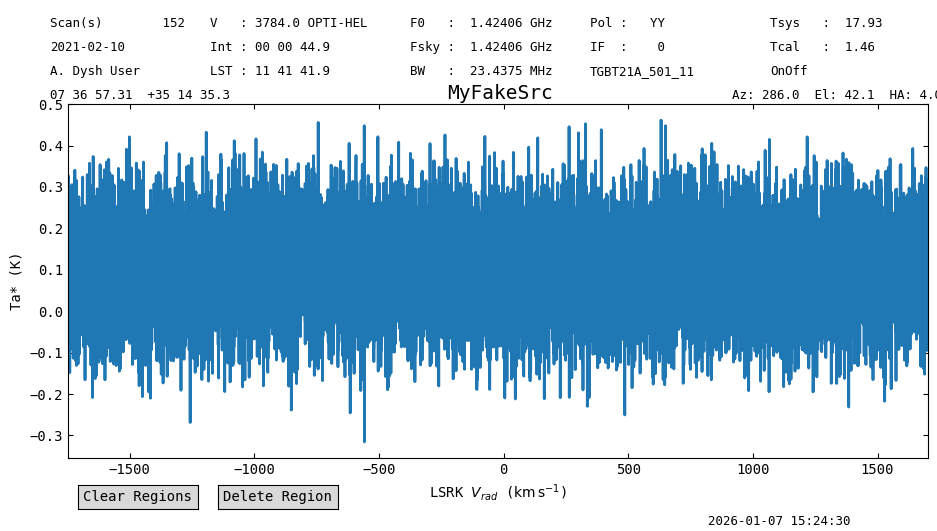

In [16]:
s.plot(vel_frame='lsrk', doppler_convention='radio', xaxis_unit='km/s')

Find the hydrogen recombination lines that could be in this spectrum, and display their name, chemical name and frequency (in MHz).

In [17]:
s.recomb(line='hydrogen', cat='gbtrecomb', columns=['name', 'chemical_name', 'rest_frequency','obs_frequency'])

name,chemical_name,rest_frequency,obs_frequency
,,,
str10,str27,float64,float64
H&gamma;,Hydrogen Recombination Line,1436.17485014444,1418.0880871880995
H&beta;,Hydrogen Recombination Line,1440.71993807134,1422.5759356166604
H&epsilon;,Hydrogen Recombination Line,1443.2677438484002,1425.0916550783643
H&delta;,Hydrogen Recombination Line,1446.14393752243,1427.9316268166085
H&zeta;,Hydrogen Recombination Line,1447.12682709455,1428.902138167023


Find all lines in the spectrum's frequency range.

In [18]:
s.query_lines(cat='gbtlines',columns=['name', 'chemical_name', 'rest_frequency','obs_frequency'])

name,chemical_name,rest_frequency,obs_frequency
,,,
str62,str16,float64,float64
17OH,Hydroxyl radical,1445.0345,1426.8361612234887
ND<sub>3</sub>,Ammonia,1434.448,1416.3829844856375
ND<sub>3</sub>,Ammonia,1434.448,1416.3829844856375
ND<sub>3</sub>,Ammonia,1434.448,1416.3829844856375
ND<sub>3</sub>,Ammonia,1434.448,1416.3829844856375
ND<sub>3</sub>,Ammonia,1437.179,1419.0795910762079
ND<sub>3</sub>,Ammonia,1448.056,1429.819609342642
ND<sub>3</sub>,Ammonia,1448.056,1429.819609342642


To clear the cache, use:

In [19]:
SpectralLineSearch.clear_cache()